In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from string import punctuation

%matplotlib inline



In [41]:
data=pd.read_csv("spam_ham_dataset(1)(1).csv")
data.columns

Index(['# sent emails ', 'label', 'text', 'label_num'], dtype='object')

In [42]:
data.describe()


,# sent emails,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   5171 non-null   int64 
 1   label           5171 non-null   object
 2   text            5171 non-null   object
 3   label_num       5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [44]:
print (data.isnull().sum())

# sent emails     0
label             0
text              0
label_num         0
dtype: int64


In [45]:
data.duplicated().sum()

0

In [46]:
data.max()

# sent emails                                                  5170
label                                                          spam
text              Subject: zero path termination in path manager...
label_num                                                         1
dtype: object

<Axes: >

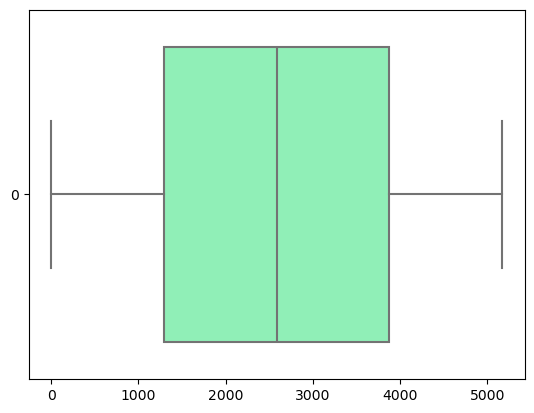

In [47]:
sns.boxplot(data=data['# sent emails '],palette='rainbow',orient='h')


In [48]:
data.columns = data.columns.str.strip()
data = data.rename(columns={'# sent emails': 'sent_emails'})

In [49]:
data.head()

,sent_emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [50]:
data=data.drop('label',axis=1)


- cleaning
  1. remove punctuation
  2. lowercase
  3. stop word removal
  4. tokinization
  5. TF-IDF


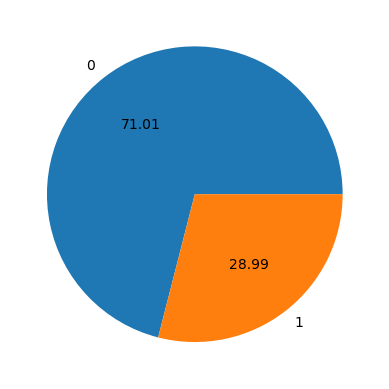

In [51]:
plt.pie(data['label_num'].value_counts(), labels=['0','1'],autopct="%0.2f")
plt.show()

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

text_data = data["text"]

vectorizer = CountVectorizer(max_features=200, lowercase=True, stop_words='english')

encoded_text = vectorizer.fit_transform(text_data)

print(encoded_text.shape)


(5171, 200)


In [53]:
data.head()

,sent_emails,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0


<Axes: >

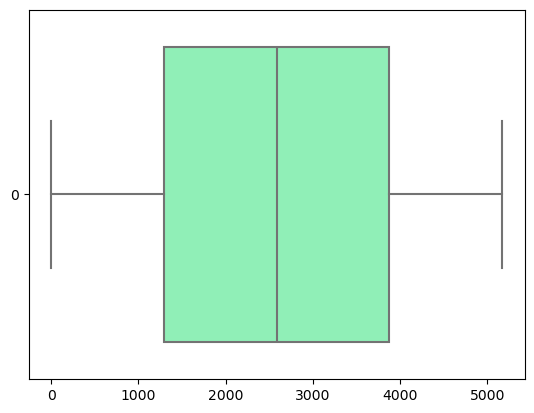

In [54]:
sns.boxplot(data=data['sent_emails'],palette='rainbow',orient='h')

In [55]:
# !pip install scikit-learn

In [56]:
X=encoded_text
Y=data['label_num'].values

In [57]:
X.shape

(5171, 200)

In [58]:
Y.shape

(5171,)

In [59]:
print(Y)

[0 0 0 ... 0 0 1]


In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [61]:
X_test.shape

(1035, 200)

In [62]:
X_train.shape


(4136, 200)

In [63]:
Y_train.shape


(4136,)

In [64]:
Y_test.shape

(1035,)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)

accuracy_log = model_log.score(X_test, Y_test)
accuracy_train_lo = model_log.score(X_train, Y_train)
print("Accuracy_log:", accuracy_log)
print("Accuracy_train:", accuracy_train_lo)

Accuracy_log: 0.9555555555555556
Accuracy_train: 0.9673597678916828


In [66]:
X_test

<1035x200 sparse matrix of type '<class 'numpy.int64'>'
	with 17360 stored elements in Compressed Sparse Row format>

In [67]:
Y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
from sklearn.svm import SVC
# Train SVM model (replace hyperparameters as needed)
model_svm = SVC(kernel='linear', C=1.0, random_state=42)
model_svm.fit(X_train, Y_train)

accuracy_svm = model_svm.score(X_test, Y_test)
accuracy_train=model_svm.score(X_train,Y_train)
print("SVM Accuracy:", accuracy_svm)
print("SVM Accuracy:", accuracy_train)

SVM Accuracy: 0.9526570048309179
SVM Accuracy: 0.9690522243713733


In [69]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree model (replace hyperparameters as needed)
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X_train,Y_train)

accuracy_dt = model_dt.score(X_test, Y_test)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8299516908212561


In [70]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  
model_rf.fit(X_train, Y_train)

accuracy_rf = model_rf.score(X_test, Y_test)
print("Random Force Accuracy:", accuracy_rf)




Random Force Accuracy: 0.9594202898550724


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define hyperparameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 7, 10]
}

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Create and train models with GridSearchCV
model_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5)
model_lr.fit(X_train,Y_train)

model_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)  # 5-fold cross-validation
model_svm.fit(X_train, Y_train)

model_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
model_rf.fit(X_train, Y_train)

model_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
model_dt.fit(X_train,Y_train)

# Get the best models and their parameters
best_model_lr = model_lr.best_estimator_
best_params_lr = model_lr.best_params_

best_model_svm = model_svm.best_estimator_
best_params_svm = model_svm.best_params_

best_model_rf = model_rf.best_estimator_
best_params_rf = model_rf.best_params_

best_model_dt = model_dt.best_estimator_
best_params_dt = model_dt.best_params_


# Logistic Regression model prediction
y_pred_lr = model_log.predict(X_test)
print(accuracy_score(Y_test,y_pred_lr))

# SVM model prediction
y_pred_svm = model_svm.predict(X_test)
print(accuracy_score(Y_test,y_pred_svm))

# Decision Tree model prediction
y_pred_dt = model_dt.predict(X_test)
print(accuracy_score(Y_test,y_pred_dt))

# Random Forest model prediction
y_pred_rf = model_rf.predict(X_test)
print(accuracy_score(Y_test,y_pred_rf))



c:\Users\hadde\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hadde\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9555555555555556
0.9487922705314009
0.9043478260869565
0.9439613526570049


In [72]:
# Example for Logistic Regression model
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)
# Calculate precision and recall for other models (SVM, Decision Tree) similarly
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)

precision_dt = precision_score(Y_test, y_pred_dt)
recall_dt = recall_score(Y_test, y_pred_dt)

precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)

# Print results
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)

print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)

print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)

print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)


Logistic Regression Precision: 0.8785046728971962
Logistic Regression Recall: 0.9757785467128027
SVM Precision: 0.86875
SVM Recall: 0.9619377162629758
Decision Tree Precision: 0.7486910994764397
Decision Tree Recall: 0.9896193771626297
Random Forest Precision: 0.8489425981873112
Random Forest Recall: 0.972318339100346


In [73]:
# Example for Logistic Regression model
confusion_matrix_lr = confusion_matrix(Y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix_lr)

# Calculate confusion matrix for other models (SVM, Decision Tree) similarly
confusion_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", confusion_matrix_svm)

confusion_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

confusion_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)



Logistic Regression Confusion Matrix:
 [[707  39]
 [  7 282]]
SVM Confusion Matrix:
 [[704  42]
 [ 11 278]]
Decision Tree Confusion Matrix:
 [[650  96]
 [  3 286]]
Random Forest Confusion Matrix:
 [[696  50]
 [  8 281]]


In [74]:
import joblib
joblib_file_log="email_classification_model_logistic"
joblib_file_svm="email_classification_model_svm"
joblib_file_dt="email_classification_model_dt"
joblib_file_rf="email_classification_model_rf"
joblib_file_vectorizer="vectorization_text"
joblib.dump(model_log,joblib_file_log)
joblib.dump(model_svm,joblib_file_svm)
joblib.dump(model_dt,joblib_file_dt)
joblib.dump(model_rf,joblib_file_rf)
joblib.dump(vectorizer,joblib_file_vectorizer)

loaded_model_log=joblib.load(open(joblib_file_log,'rb'))
loaded_model_svm=joblib.load(open(joblib_file_svm,'rb'))
loaded_model_dt=joblib.load(open(joblib_file_dt,'rb'))
loaded_model_rf=joblib.load(open(joblib_file_rf,'rb'))

print(accuracy_score(Y_test,y_pred_lr))
print(accuracy_score(Y_test,y_pred_svm))
print(accuracy_score(Y_test,y_pred_dt))
print(accuracy_score(Y_test,y_pred_rf))

0.9555555555555556
0.9487922705314009
0.9043478260869565
0.9439613526570049
